In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aydafrough","key":"6f11d390d25b1f8e7987d65c72badb9a"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57           4468        135  1.0              
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                     60KB  2023-07-28 15:36:38          15572        526  1.0              
alitaqi000/global-population-trends2016-2022               Global Population Trends(2016-2022)                32KB  2023-08-28 12:53:06            983         23  1.0              
inductiveanks/top-1000-imdb-movies-dataset                 Top 1000 IMDb Movies Dataset        

In [ ]:
!kaggle datasets download -d venky73/spam-mails-dataset

 54% 1.00M/1.86M [00:00<00:00, 2.00MB/s]
100% 1.86M/1.86M [00:00<00:00, 3.24MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('spam-mails-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
df=pd.read_csv("spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
df['length']=df['Unnamed: 0']

In [ ]:
df

,Unnamed: 0,label,text,label_num,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,605
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,2349
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,3624
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,4685
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,2030
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,1518
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,404
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,2933
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,1409


In [ ]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [ ]:
#to balancing data
ham=df[df['label']== 'ham']
spam=df[df['label']== 'spam']
spam.shape

(1499, 5)

In [ ]:
ham=ham.sample(spam.shape[0])

In [ ]:
ham.shape

(1499, 5)

In [ ]:
data=ham.append(spam,ignore_index=True)

<ipython-input-17-fb096279c7b2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam,ignore_index=True)


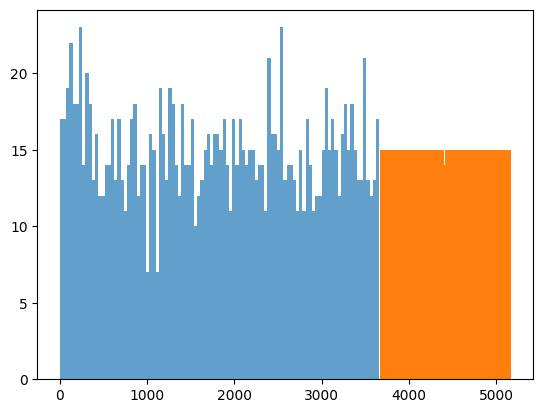

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.2, shuffle=True)

In [ ]:
x_train.shape

(2398,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
classifier =Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=100))])


In [ ]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.9616666666666667

In [ ]:
confusion_matrix(y_test,y_pred)

array([[291,  23],
       [  0, 286]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.96       314
        spam       0.93      1.00      0.96       286

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [ ]:
from sklearn.svm import SVC

svm=Pipeline([("tfidf", TfidfVectorizer()),("svm",SVC(C=100,gamma='auto'))])

In [ ]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred=svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.4766666666666667

In [ ]:
confusion_matrix(y_test,y_pred)

array([[  0, 314],
       [  0, 286]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.00      0.00      0.00       314
        spam       0.48      1.00      0.65       286

    accuracy                           0.48       600
   macro avg       0.24      0.50      0.32       600
weighted avg       0.23      0.48      0.31       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test1=['Congratulations, You won a lottery ticket worth $1 Million! To claim call on 4446655']
test2=['Hope you are doing good and learning new things!']

In [ ]:
classifier.predict(test1)


array(['spam'], dtype=object)

In [ ]:
classifier.predict(test2)

array(['spam'], dtype=object)

In [ ]:
svm.predict(test1)

array(['spam'], dtype=object)

In [ ]:
svm.predict(test2)

array(['spam'], dtype=object)